In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

La première ligne sert à activer le rendu graphique, pour tout le fichier notebook. Pour **dessiner des graphiques**, il vous est conseillé de suivre la méthode illustrée par le code suivant que vous pouvez executer dans une deuxième cellule notebook.

<IPython.core.display.Javascript object>


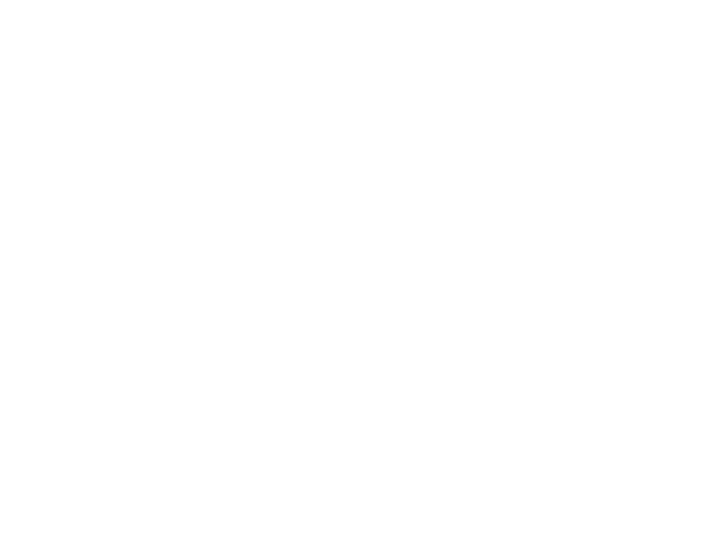

In [2]:
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1)

fig.show()

* Creation des objets `fig`et `ax`
* Ajout successif de graphiques sur la même figure par l'appel à des methodes de l'objet `ax`
* Affichage de la figure complète via `fig.show()`
* Evaluation de la cellule pour visualisation dans la cellule de résultats.

L'affichage dans la cellule de rendu du notebook devrait confirmer la bonne installation des dépendances.

### Description statistique des Fold Change

##### source:`data/TCL_wt1.tsv`

##### 1. Charger le contenu de ce fichier dans un notebook en eliminant les lignes porteuses de valeurs numériques aberrantes.

##### 2. Representez par un histogramme les valeurs de `Log2 Corrected Abundance Ratio`

##### 3. A partir de cette échantillon de ratio d'abondance,  estimez la moyenne <img src="https://render.githubusercontent.com/render/math?math=\mu"> et l'ecart-type <img src="https://render.githubusercontent.com/render/math?math=\sigma"> d'une loi normale.

In [3]:
with open("data/TCL_wt1.tsv", "r") as f:
    thelist = f.readlines()

In [4]:
def arefloat(i):
    try:
        float(i)
    except:
        return False
    return True

In [5]:
thelist[1][:-2]

'P75936\tBasal-body rod modification protein FlgD OS=Escherichia coli (strain K12) OX=83333 GN=flgD PE=3 SV=1\tflgD\t0.075816993\t-3.721334942\t5.49456E-05\t4.26006746'

In [6]:
thelist[1][:-2].split("\t")

['P75936',
 'Basal-body rod modification protein FlgD OS=Escherichia coli (strain K12) OX=83333 GN=flgD PE=3 SV=1',
 'flgD',
 '0.075816993',
 '-3.721334942',
 '5.49456E-05',
 '4.26006746']

In [7]:
thelist[0].split("\t")

['Accession',
 'Description',
 'Gene Symbol',
 'Corrected Abundance ratio (1.53)',
 'Log2 Corrected Abundance Ratio',
 'Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)',
 '-LOG10 Adj.P-val\n']

In [8]:
newlist=[]

for line in thelist:
    l_tab = (line.split("\n")[0]).split("\t")
    new_line = tuple(l_tab)
    if len(l_tab) == 7:
        if arefloat(l_tab[3]) and arefloat(l_tab[6]) and arefloat(l_tab[4]) and arefloat(l_tab[5]) and l_tab[0] !="" and l_tab[1]!="" and l_tab[2]!="":
            a = new_line[0]
            b = new_line[1]
            c = new_line[2]
            d = float(new_line[3])
            e = float(new_line[4])
            f = float(new_line[5])
            g = float(new_line[6])
            newlist.append((a,b,c,d,e,f,g))
        

In [9]:
len(newlist)

1746

##### 2. Representez par un histogramme les valeurs de `Log2 Corrected Abundance Ratio`



In [10]:
Ratio = np.asarray([el[4] for el in newlist])

In [11]:
fig, ax = plt.subplots()


ax.hist(Ratio)

fig.show()

<IPython.core.display.Javascript object>

##### 3. A partir de cette échantillon de ratio d'abondance,  estimez la moyenne et l'ecart-type  d'une loi normale.

In [12]:
moy = np.mean(Ratio)
moy

-0.63862621564433

In [13]:
var = np.var(Ratio)*len(Ratio)/(len(Ratio)-1)
std = var**0.5
std, var

(0.4707593462304346, 0.22161436206330618)

In [14]:
fig, ax = plt.subplots()
hist = ax.hist(Ratio, bins=100) # draw histogram
x = np.linspace(min(Ratio), max(Ratio), 100) # generate PDF domain points
dx = hist[1][1] - hist[1][0] # Get single value bar height
scale = len(Ratio)*dx # scale accordingly
ax.plot(x, norm.pdf(x, moy, std)*scale) # compute theoritical PDF and draw it
ax.set_xlabel("Log_2 abundance ratio")
ax.set_ylabel("n")
ax.set_title("Histogram of abundance ratio and coresponding normal law")
fig.show()

<IPython.core.display.Javascript object>

In [15]:
pval = np.asarray([el[6] for el in newlist])

In [16]:
fig, ax = plt.subplots()
x = Ratio 
y = pval

ax.scatter(x,y) # compute theoritical PDF and draw it
ax.vlines(moy+std,3,9,colors = "r")
ax.hlines(3,moy+std,1,colors = "r")
ax.set_xlabel("Log_2 abundance ratio")
ax.set_ylabel("-Log_10_pval")
ax.set_title("-Log_10_pval = f(Log_2 abundance ratio)")
fig.show()

<IPython.core.display.Javascript object>

In [17]:
moy+std

-0.1678668694138954

In [18]:
tmp1 = np.argwhere(Ratio > moy+std)

In [19]:
tmp2 = np.argwhere(pval[tmp1]>3)
tmp2[:,0]

array([ 6, 26, 45, 67, 72, 74, 76, 77, 80, 81, 82, 85, 87, 92],
      dtype=int64)

In [20]:
index = tmp1[tmp2[:,0]]
index = [el[0] for el in index]
index

[1658,
 1678,
 1697,
 1719,
 1724,
 1726,
 1728,
 1729,
 1732,
 1733,
 1734,
 1737,
 1739,
 1744]

In [21]:
fig, ax = plt.subplots()
x = Ratio 
y = pval
x_2 = Ratio[index]
y_2 = pval[index]
ax.scatter(x,y) # compute theoritical PDF and draw it
ax.scatter(x_2,y_2,color ="red") # compute theoritical PDF and draw it
ax.vlines(moy+std,3,9,colors = "r")
ax.hlines(3,moy+std,1,colors = "r")
ax.set_xlabel("Log_2 abundance ratio")
ax.set_ylabel("-Log_10_pval")
ax.set_title("-Log_10_pval = f(Log_2 abundance ratio)")
fig.show()

<IPython.core.display.Javascript object>

In [22]:
access = [el[0] for el in newlist]

In [23]:
expresp = [access[i] for i in index]

In [24]:
expresp

['P0A8V6',
 'P0A9Q1',
 'P02358',
 'P0ACF8',
 'P62399',
 'P0A905',
 'P76506',
 'P13036',
 'P10384',
 'P06971',
 'P0A910',
 'P06996',
 'P76344',
 'P02931']

In [25]:
from xml.etree.ElementTree import parse, dump
# Parse the E.Coli proteome XML Document
tree = parse('data/uniprot-proteome_UP000000625.xml')
root = tree.getroot()
ns = '{http://uniprot.org/uniprot}' # MANDATORY PREFIX FOR ANY SEARCH within document
# Store all entries aka proteins in a list of xml nodes
proteins = root.findall(ns + 'entry')
# Display the xml subtree of the first protein 
dump(proteins[0])

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" dataset="Swiss-Prot" created="1989-10-01" modified="2020-08-12" version="166">
<ns0:accession>P11446</ns0:accession>
<ns0:accession>Q2M8Q3</ns0:accession>
<ns0:name>ARGC_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName evidence="1 4">N-acetyl-gamma-glutamyl-phosphate reductase</ns0:fullName>
<ns0:shortName evidence="1 4">AGPR</ns0:shortName>
<ns0:ecNumber evidence="1 2">1.2.1.38</ns0:ecNumber>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName evidence="1 3">N-acetyl-glutamate semialdehyde dehydrogenase</ns0:fullName>
<ns0:shortName evidence="1 3">NAGSA dehydrogenase</ns0:shortName>
</ns0:alternativeName>
</ns0:protein>
<ns0:gene>
<ns0:name type="primary" evidence="1">argC</ns0:name>
<ns0:name type="ordered locus">b3958</ns0:name>
<ns0:name type="ordered locus">JW3930</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:name>
<ns0:dbReference type="NCBI Taxonomy" 

In [26]:
# Find the xml subtree of a protein with accession "P31224"
look = None
for entry in proteins:
    accessions = entry.findall(ns+"accession")
    for acc in accessions:
        if acc.text == "P31224":
            #dump(entry)
            look = entry
            break

In [36]:
#return all GO from a protlist as a set:
#proteins is the xml element build with the teacher code
#protlist is the list of overabundant protein accession numbers
def GO_Sets(proteins, protlist):
    mylist = []
    for entry in proteins:
        accessions = entry.findall(ns+"accession")
        for acc in accessions:
            if acc.text in expresp:
                #dump(entry)
                a = entry.iter()
                for el in a:
                    it = el.items()
                    if len(it) == 2:
                        if it[0][1] == "GO":
                            mylist.append(it[1][1])
    myset = set(mylist)
    return myset

In [37]:
GO_Sets(proteins, expresp)

{'GO:0000027',
 'GO:0000049',
 'GO:0000062',
 'GO:0000156',
 'GO:0000160',
 'GO:0000746',
 'GO:0000976',
 'GO:0001216',
 'GO:0001217',
 'GO:0001530',
 'GO:0001618',
 'GO:0003677',
 'GO:0003680',
 'GO:0003681',
 'GO:0003700',
 'GO:0003723',
 'GO:0003735',
 'GO:0005216',
 'GO:0005506',
 'GO:0005829',
 'GO:0006355',
 'GO:0006412',
 'GO:0006417',
 'GO:0006811',
 'GO:0006826',
 'GO:0006855',
 'GO:0006882',
 'GO:0006974',
 'GO:0008097',
 'GO:0008270',
 'GO:0008289',
 'GO:0009279',
 'GO:0009295',
 'GO:0009597',
 'GO:0015075',
 'GO:0015091',
 'GO:0015288',
 'GO:0015344',
 'GO:0015483',
 'GO:0015643',
 'GO:0015914',
 'GO:0016020',
 'GO:0016021',
 'GO:0016458',
 'GO:0019217',
 'GO:0019395',
 'GO:0019867',
 'GO:0019904',
 'GO:0022625',
 'GO:0022627',
 'GO:0022834',
 'GO:0030288',
 'GO:0032993',
 'GO:0034220',
 'GO:0034224',
 'GO:0034702',
 'GO:0038023',
 'GO:0042802',
 'GO:0042910',
 'GO:0042912',
 'GO:0045203',
 'GO:0045723',
 'GO:0045892',
 'GO:0045893',
 'GO:0046718',
 'GO:0046790',
 'GO:00468

In [30]:
print(myset)

{'GO:0022627', 'GO:0001217', 'GO:0015075', 'GO:0006417', 'GO:0042910', 'GO:0046872', 'GO:0001216', 'GO:0015643', 'GO:0015344', 'GO:0003700', 'GO:0048037', 'GO:0032993', 'GO:0048027', 'GO:0022834', 'GO:0009597', 'GO:0006811', 'GO:0005506', 'GO:0047485', 'GO:0120010', 'GO:0000746', 'GO:0070207', 'GO:0042912', 'GO:0015288', 'GO:0045203', 'GO:0000160', 'GO:0008097', 'GO:0046930', 'GO:0046790', 'GO:0045723', 'GO:0034702', 'GO:0019904', 'GO:0015914', 'GO:0003680', 'GO:0045893', 'GO:0000976', 'GO:0006826', 'GO:0000156', 'GO:0016021', 'GO:0034220', 'GO:0000062', 'GO:0019867', 'GO:0016020', 'GO:0006355', 'GO:0019217', 'GO:0003723', 'GO:0005829', 'GO:0006412', 'GO:0070181', 'GO:0006882', 'GO:0045892', 'GO:0071276', 'GO:0034224', 'GO:0097718', 'GO:0008289', 'GO:0022625', 'GO:0016458', 'GO:0003681', 'GO:0008270', 'GO:0001530', 'GO:0046983', 'GO:0038023', 'GO:0001618', 'GO:0005216', 'GO:0019395', 'GO:0000049', 'GO:0046718', 'GO:0046870', 'GO:0000027', 'GO:0006855', 'GO:0006974', 'GO:0030288', 'GO:0

In [31]:
len(myset)

82

In [32]:
len(mylist)

124